# Prepare

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib


sns.set()
pd.set_option("display.max_columns", None)



# Prepare image datasets

In [2]:
%pwd

'C:\\Users\\redoa\\workspace\\projects\\Alien_vs_Predator_ep1'

In [3]:
files = "../alien_vs_predator_ep2/Data"
os.listdir(files)

['Test', 'Train', 'Validation']

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory as get_img

train_dir = f"{files}/Train"
valid_dir = f"{files}/Validation"

img_height = 150
img_width = 150

In [5]:
train_data = get_img(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=494
)

Found 494 files belonging to 2 classes.


In [6]:
for X_train, y_train in train_data.take(1):
    print(X_train.shape, y_train.shape)

(494, 150, 150, 3) (494,)


In [7]:
valid_data = get_img(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=200
)

Found 200 files belonging to 2 classes.


In [8]:
for X_valid, y_valid in valid_data.take(1):
    print(X_valid.shape, y_valid.shape)

(200, 150, 150, 3) (200,)


In [9]:
y_train

<tf.Tensor: shape=(494,), dtype=int32, numpy=
array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
     

In [10]:
y_valid

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1])>

In [11]:
# check classes each datasets
train_class = train_data.class_names
valid_class = valid_data.class_names
print(train_class, valid_class)

['Alien', 'Predator'] ['Alien', 'Predator']


# Preprocessing

In [12]:
print(type(X_train), X_train.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (494, 150, 150, 3)


In [13]:
#Scaling

X_train_sc = X_train.numpy().astype("float32")/255.0
X_valid_sc = X_valid.numpy().astype("float32")/255.0

y_train_np, y_valid_np = y_train.numpy(), y_valid.numpy()
print(
    type(X_train_sc),type(X_valid_sc),type(y_train_np),type(y_valid_np),
)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
print(X_train_sc.shape, X_valid_sc.shape)

(494, 150, 150, 3) (200, 150, 150, 3)


# Model

Constructing model by using batch normalization.
$$

$$

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization


In [16]:
model = Sequential([
    layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])
model

In [17]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [19]:
history = model.fit(
    x=X_train_sc,
    y=y_train_np,
    validation_data=(X_valid_sc, y_valid_np),
    epochs=100,
    batch_size=494
)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.7008 - accuracy: 0.5000 - val_loss: 1.4121 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 216ms/step - loss: 1.3430 - accuracy: 0.5000 - val_loss: 0.9202 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 233ms/step - loss: 0.9374 - accuracy: 0.5000 - val_loss: 0.8255 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 217ms/step - loss: 0.8357 - accuracy: 0.5000 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 233ms/step - loss: 0.6681 - accuracy: 0.5000 - val_loss: 0.6695 - val_accuracy: 0.5950
Epoch 6/100
1/1 [==============================] - 0s 217ms/step - loss: 0.6512 - accuracy: 0.6437 - val_loss: 0.6914 - val_accuracy: 0.5300
Epoch 7/100
1/1 [==============================] - 0s 234ms/step - loss: 0.6690 - accuracy: 0.5587 - val_loss: 0.6988 - val_accuracy: 0.5250
Epoch 8/100
1/1 

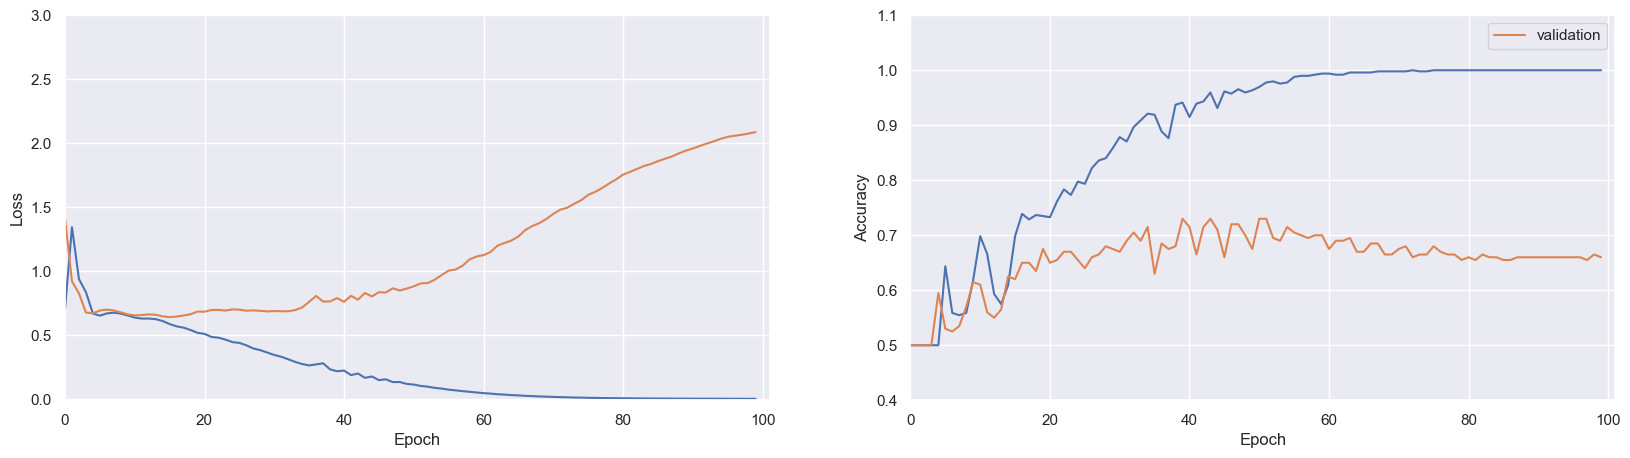

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))  # make 2 subplots

# subplot for loss
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'], label="validation")
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_xlim(0, 101)
ax[0].set_ylim(-0.01, 3)

# subplot for acc
ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'], label="validation")
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlim(0, 101)
ax[1].set_ylim(0.4, 1.1)
plt.legend()
plt.show()

# Report

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def make_report(model, input_X_data_np, y_truedata_np):
    """This function lets Classification_report, Confusion Matrix(Heat map) and ROC-AUC out. FOR CLASSIFICATION ONLY"""
    
    # Classification_report
    y_pred = model.predict(input_X_data_np)
    cr = classification_report(y_true=y_truedata_np, y_pred=y_pred>0.75)
    print(cr)
    
    # Confusion Matrix(Heat map)
    cm = confusion_matrix(y_true=y_truedata_np, y_pred=y_pred>0.75)
    cm_heat = pd.DataFrame(data=cm, index=["Alien", "Predator"], 
                           columns=["Alien", "Predator"])
    sns.heatmap(cm_heat, square=True, annot=True, cmap="Spectral")
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.yticks(rotation=0)
    plt.show()
    

    # ROC-AUC

    fpr, tpr, thresholds = roc_curve(y_truedata_np, y_pred)
    ac = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%ac)
    plt.fill_between(fpr, tpr, 0, color="red", alpha=0.1)
    plt.legend()
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    # plt.grid()
    plt.show()

## Train reports

16/16 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       247

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



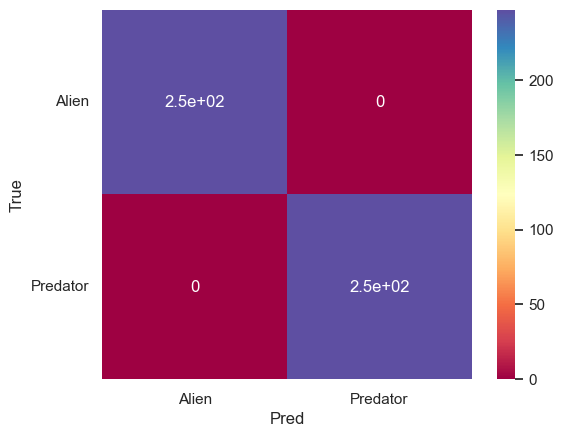

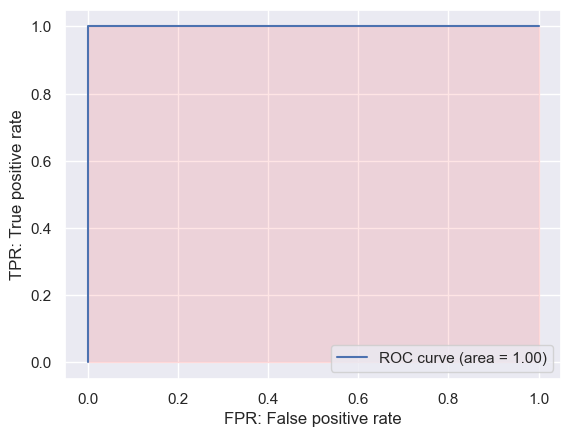

In [23]:
make_report(model, X_train_sc, y_train_np)

## valod reports

7/7 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       100
           1       0.68      0.61      0.64       100

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



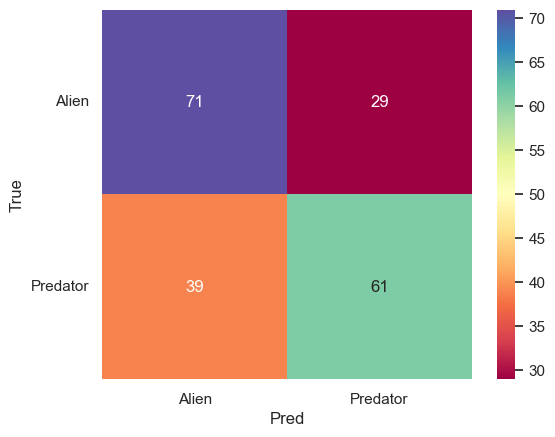

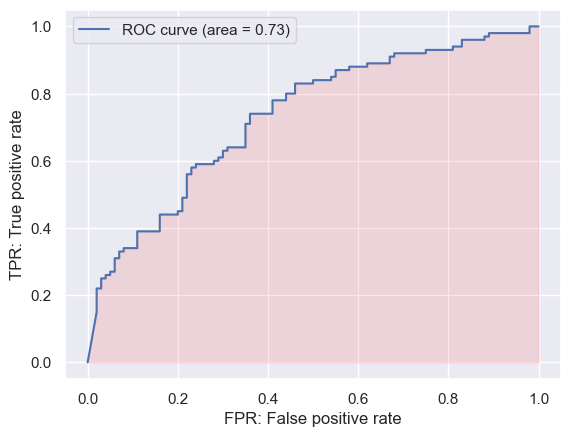

In [24]:
make_report(model, X_valid_sc, y_valid_np)

# Save model

In [25]:
model.save("model_ep1")

INFO:tensorflow:Assets written to: model_ep1\assets


INFO:tensorflow:Assets written to: model_ep1\assets
